In [3]:
import numpy
from numpy import sqrt, pi, exp, linspace, loadtxt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

bv:  [  1.95102059e+00   1.55743468e-02   4.31952695e-01   2.73159652e-09]
cov:  [[  9.15928688e-02   5.48967498e-01   2.71665289e-01   5.09923062e-12]
 [  5.48967498e-01   5.28473873e+00   2.24595965e+00   5.37542799e-11]
 [  2.71665289e-01   2.24595965e+00   1.00137389e+00   2.21370701e-11]
 [  5.09923062e-12   5.37542799e-11   2.21370701e-11   5.66764211e-22]]
D1/D2 =  125.271423321
[ 0.842  0.744  0.848  0.902  0.932  1.024  1.188  1.338  1.507  1.671]


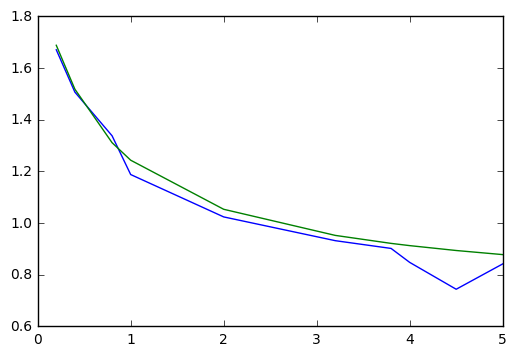

In [8]:
data = loadtxt('data_files\\aik.dat')
x0 = data[:,0]
D_obs = data[:,1]*1e10

def spherical(x0, D1, D2, K, d):
    k = 1.38e-23
    T = 298
    eta = 0.00125
    x1 = (1+2*K*x0-(1+4*K*x0)**.5)/(2*(K**2)*x0)
    
    M = numpy.zeros(len(x1))
    for i in range(3, 101):
        M += i**(2/3)*(K*x1)**(i-1)
    
    D = (x1/x0)*(D1+2*K*x1*D2+((k*T*1e10)/(3*pi*eta*d))*M)
    return D

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[1e-1, 1e-1, 4e-1,1e-9],
#         method='trf',
        max_nfev=100*len(x0),
        loss='soft_l1',
        bounds=([1e-2,1e-2,1e-1,3e-11], [1e2, 1e2, 10., 3e-9]))

print('bv: ', bv)
print('cov: ', cov)
print('D1/D2 = ', bv[0]/bv[1])
print(D_obs)

plt.plot(x0, D_obs)
plt.plot(x0, spherical(x0, bv[0], bv[1], bv[2], bv[3]))